<a href="https://colab.research.google.com/github/pyqt555/cudaFieldLines/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numba 
import math
import time
import cv2 as cv2
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb as rgb
import os
from google.colab.patches import cv2_imshow
from joblib import Parallel, delayed
from multiprocessing.dummy import Pool as ThreadPool
import itertools

charge=[x,y,c]

In [12]:
X=0
Y=1
C=2
TIMESCALE=10
E0=1

In [ ]:
def compute_force(c1,c2):

    c_dir=c1[C]*c2[C]
    dist=np.sqrt(np.square(c1[X]-c2[X])+np.square(c1[Y]-c2[Y]))
    dir_vec=[c1[X]-c2[X],c1[Y]-c2[Y]]
    dir_len=dist
    norm_vec=[dir_vec[X]/dir_len,dir_vec[Y]/dir_len]
    return_const=(1/(4*math.pi*np.square(dist)*E0))*TIMESCALE*c_dir
    return_vec=[norm_vec[X]*return_const,norm_vec[Y]*return_const]
    return return_vec


In [ ]:
%timeit compute_force([1,0,1],[-1,0,1])

9.02 µs ± 139 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


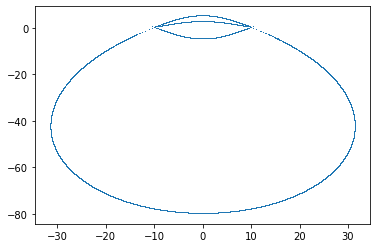

array([[-1.13882007e-03,  5.00000000e+00, -1.00000000e+00],
       [-2.27764016e-03,  4.99999984e+00, -1.00000000e+00],
       [-3.41646032e-03,  4.99999953e+00, -1.00000000e+00],
       ...,
       [-1.52643141e+01, -4.73830829e+00, -1.00000000e+02],
       [-1.00000000e+01,  0.00000000e+00, -1.00000000e+00],
       [ 1.00000000e+01,  0.00000000e+00,  1.00000000e+00]])

In [ ]:
lst=[]
testcharge=[0,5,-1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,5,1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,2.5,-1]
for i in range(3364):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,2.5,1]
for i in range(3364):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
## underside
testcharge=[0,-5,-1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,-5,1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,-80,100]
for i in range(121400):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,-80,-100]
for i in range(121400):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
## plot

lst.append([-10,0,-1])
lst.append([10,0,1])
lst=np.array(lst)
plt.plot(lst[:,0], lst[:,1],",")
plt.show()
lst

Numba Implementation(slow and wrong)

In [11]:

@numba.vectorize(["float64(float64,float64,float64,float64,float64,float64)"])
def compute_forces(c1,c2,x1,x2,y1,y2):
    c_dir=c1*c2
    dist=(((x1-x2)**2)+((y1-y2)**2))**.5
    dir_vec=[x1-x2,y1-y2]
    dir_len=dist
    norm_vec=[dir_vec[X]/dir_len,dir_vec[Y]/dir_len]
    return_const=(1/(4*math.pi*(dist**2)*E0))*TIMESCALE*c_dir
    return_vec=[norm_vec[X]*return_const,norm_vec[Y]*return_const]
    return return_vec[0]

In [ ]:
compute_forces.ufunc.types

['dddddd->d']

In [ ]:
test=np.random.random((6,100000))


%timeit compute_forces(*test)

30.4 ms ± 361 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Numba (fast)

In [13]:
from numba import float64
@numba.guvectorize([(float64[:],float64[:],float64[:])], '(n),(n)->(n)',target="parallel")
def compute_force_guv(c1,c2,res):
    c_dir=c1[C]*c2[C]
    dist=((c1[X]-c2[X])**2+(c1[Y]-c2[Y])**2)**.5
    dir_vec=[c1[X]-c2[X],c1[Y]-c2[Y]]
    dir_len=dist
    norm_vec=[dir_vec[X]/dir_len,dir_vec[Y]/dir_len]
    return_const=(1/(4*math.pi*(dist**2)*E0))*TIMESCALE*c_dir*(-1)#-1 for correct direction
    res[:]=[norm_vec[X]*return_const,norm_vec[Y]*return_const,0]
    
    #print(res)

In [ ]:
test=np.random.random((3,2,100))



%timeit compute_force_guv(*test)

ValueError: ignored

In [ ]:
compute_force_guv.ufunc.signature

In [14]:
test2=np.array([[[1,1,1],[2,2,2]]],dtype="float64")
res=np.zeros((2,3))
@numba.jit
def compute_vectors_guv_fixed_output(non_statics,statics):
    f=compute_force_guv(non_statics,statics,np.zeros((statics.shape[0],3)))[:,:2]
    return np.array([np.sum(f[:,0]),np.sum(f[:,1])])



In [ ]:
%prun compute_vectors_guv_fixed_output(np.array([[0,0,1]]),np.random.random((200000,3)))

In [ ]:

%timeit compute_vectors_guv_fixed_output(np.random.random((10000,3)),np.random.random((10000,3)))

In [28]:
#@numba.jit
def compute_line(testcharge,line_length,statics):
  print("new Charge")
  positions=[]
  for i in range(int(line_length)):
        if i%10==0:
          print(i)
        testcharge_dir=compute_vectors_guv_fixed_output([testcharge],statics)
        
        testcharge=[testcharge[X]+testcharge_dir[X],testcharge[Y]+testcharge_dir[Y],testcharge[C]]
        
        if (testcharge_dir[X]**2+testcharge_dir[Y]**2) >(1*TIMESCALE)**2:
          #print(i)
          #print(np.sum(testcharge_dir**2))
          break
   
        positions.append(testcharge)
  print("computed")
  return positions

def compute_lines(statics,nonstatics,line_length=1000):
    nonstatics=nonstatics.copy()
    positions=[]
    pool = ThreadPool(nonstatics.shape[0])
    print(nonstatics.shape[0])
    results = pool.starmap(compute_line, zip(nonstatics,itertools.repeat(line_length),itertools.repeat(statics)))
    pool.close()
    pool.join()
    #results=compute_line(nonstatics[0],line_length,statics)
    return np.array(results)
        



In [11]:
pip install line_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
%load_ext line_profiler

Random tests

In [ ]:
#statics=np.random.random((2000,3))*3.145926
statics=np.random.standard_normal((100,3))#*4
nonstatics=(np.random.random((2000,3)))*2
#statics=np.sin(statics)
lst= compute_lines(statics,nonstatics)



<ipython-input-10-6512b475478c>:3: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "compute_vectors_guv_fixed_output" failed type inference due to: Untyped global name 'compute_force_guv': Cannot determine Numba type of <class 'numpy.ufunc'>

File "<ipython-input-10-6512b475478c>", line 5:
def compute_vectors_guv_fixed_output(non_statics,statics):
    f=compute_force_guv(non_statics,statics,np.zeros((statics.shape[0],3)))[:,:2]
    ^

  @numba.jit
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:152: NumbaWarning: Function "compute_vectors_guv_fixed_output" was compiled in object mode without forceobj=True.

File "<ipython-input-10-6512b475478c>", line 4:
@numba.jit
def compute_vectors_guv_fixed_output(non_statics,statics):
^

  state.func_ir.loc))
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:162: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode

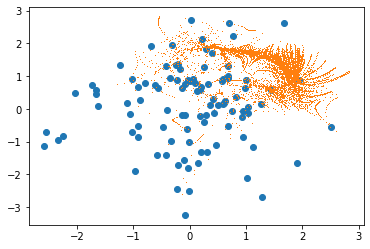

array([[2.13072496, 0.23678051, 0.86527544],
       [1.99720351, 0.21448952, 0.86527544],
       [1.82929456, 0.26888392, 0.86527544],
       ...,
       [1.75273934, 1.17567695, 1.64698653],
       [1.90628729, 0.42909754, 1.64698653],
       [1.09394916, 0.70847425, 1.64698653]])

In [ ]:
lst=np.array(lst)

plt.plot(statics[:,0], statics[:,1],"o")
plt.plot(lst[:,0], lst[:,1],",")  


plt.show()
lst

Homogen Test

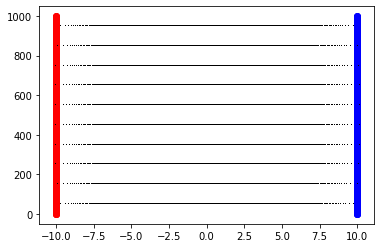

array([[ 3.15269826e-02,  5.00000000e+01,  1.00000000e+00],
       [ 6.30542819e-02,  5.00000004e+01,  1.00000000e+00],
       [ 9.45825311e-02,  5.00000011e+01,  1.00000000e+00],
       ...,
       [-9.19449748e+00,  9.49990812e+02, -1.00000000e+00],
       [-9.40769039e+00,  9.49991110e+02, -1.00000000e+00],
       [-9.71978724e+00,  9.49992826e+02, -1.00000000e+00]])

In [ ]:
Statics=np.ones((2000,3))
Statics[0:1000,0]=-10
Statics[1000:2000,0]=10
Statics[0:1000,2]=-1
Statics[0:1000,1]=range(1000)
Statics[1000:2000,1]=range(1000)
Nonstatics=np.ones((20,3))
Nonstatics[0:10,1]=range(10)
Nonstatics[10:20,1]=range(10)
Nonstatics[:,1]+=.5
Nonstatics[:,0]=0
Nonstatics[10:20,2]=-1
Nonstatics[:,1]*=100
Hfl=compute_lines(Statics,Nonstatics)
lst=np.array(Hfl)

plt.plot(Statics[0:1000,0], Statics[0:1000,1],"o" ,color=rgb((1.,1.,1.)))
plt.plot(Statics[1000:2000,0], Statics[1000:2000,1],"o" ,color=rgb((2/3,1.,1.)))
plt.plot(lst[:,0], lst[:,1],",",color="black")  


plt.show()
lst

Test imload

In [ ]:
os.listdir("sample_data")


['anscombe.json',
 'README.md',
 'test.bmp',
 'mnist_train_small.csv',
 'mnist_test.csv',
 'california_housing_test.csv',
 'california_housing_train.csv']

In [6]:
testimg=cv2.imread("sample_data/test.bmp")

#cv2_imshow(testimg)
#testimg=cv2.cvtColor(testimg,cv2.COLOR_BGR2GRAY)

#cv2_imshow()
np.array(np.where(testimg!=255)).shape

(3, 230523)

In [ ]:
test_array= np.arange(180)
test_array+=75
test_array=test_array%180
test_array

array([ 75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74])

In [16]:
def extract_charges(img,val_img=None):
  img=cv2.cvtColor(img.copy(),cv2.COLOR_BGR2HSV)
  if type(val_img)!=type(None):
    valarray=cv2.cv2Color(val_img.copy(),cv2.COLOR_BGR2GRAY)
  else:
    valarray=np.ones(img[:,:,0].shape)
   
  bluemask=cv2.inRange(img, (80,125,125), (130,255,255))
  redmaskimg=img
  redmaskimg[:,:,0]+=75
  redmaskimg[:,:,0]=redmaskimg[:,:,0]%180
  redmask=cv2.inRange(redmaskimg,(65,125,125),(85,255,255))
  #cv2_imshow(redmask)
  #cv2_imshow(bluemask)
  #pos_charge_img=redmask*valarray
  #neg_charge_img=redmask*valarray*(-1)
  charges=[]
  neg_c=np.array(np.where(bluemask!=0))
  for i in range(neg_c.shape[1]):
    coords=neg_c[:,i]
    charges.append([coords[1],bluemask.shape[0]-coords[0]-1,valarray[coords[0],coords[1]]*-1])
  pos_c=np.array(np.where(redmask!=0))
  for i in range(neg_c.shape[1]):
    coords=pos_c[:,i]
    charges.append([coords[1],bluemask.shape[0]-coords[0]-1,valarray[coords[0],coords[1]]])
  return np.array(charges)
  
#%lprun -f extract_charges extract_charges(testimg)

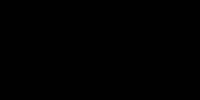

In [ ]:
testimgarray=np.ones((100,200))
cv2_imshow(testimgarray)

In [17]:
def distribute_line_charges(img,res_x,res_y=None):
  if type(res_y)==type(None):
    res_y=res_x
  
  x_coords=((np.arange(res_x)+.5)/res_x)*img.shape[1]
  y_coords=((np.arange(res_y)+.5)/res_y)*img.shape[0]
  lines=np.array(np.meshgrid(x_coords,y_coords,(-1,1))).T.reshape(-1,3)
  return lines
#%lprun -f distribute_line_charges distribute_line_charges(testimg,10)


Streaming output truncated to the last 5000 lines.
530
500
510
510
540
520520520

500

510510
490

520
520
530
540
520
520
520
520
510
500
520
520530
540

530
510
520
540
490
510520
520
530
510
540

530
520
510
520
520
520
530
490
540
480
540
520
500
530
530
540
530
530
540
510
540
500
520
540
510
540
520
540
520
520
510
540
540
510
510
540
540
530
520
530
520
530
520
520
530
530
530
510
510
530
530
520
510
530
530
530
510
520
530
540
530
550
540
530520

540
510
530
520
550
520
510
510
530
530
520
520
520
530
530
530
540
550
500
510
520
530
530
550
530
530
520
530
520
530
540
550
540
530
530
550
530
530
540
520
520
520
530
540
550530

510
520
530
530
500
550
540
540
540
530
510
550
550
540
500
550
550
540
490
520
550
550
530
510
520
530
550
520
530
530
550
550
550
540
540
520
520
540
540
530530
530

530
540
520540

540
540
520
540
530
520
540
540540

550
550
530
560
540
520
560
540
530
550540

520
530
540
540
520
530
530
560
540
530
520
540
550
560
540
540
530
560
540
540
540
540
550
5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 [242.65277119 687.66431794]
 [242.71024223 686.6834943 ]
 [242.77256706 685.685027  ]
 [242.83996014 684.66806139]
 [242.91265308 683.6316725 ]
 [242.99089658 682.57485671]
 [243.07496279 681.49652207]
 [243.16514796 680.39547707]
 [243.26177554 679.27041749]
 [243.36519989 678.11991085]
 [243.47581059 676.94237814]
 [243.59403763 675.73607189]
 [243.72035757 674.49904989]
 [243.85530104 673.22914334]
 [243.99946187 671.92391798]
 [244.15350826 670.58062612]
 [244.31819682 669.19614678]
 [244.49439006 667.76691027]
 [244.68307884 666.28880173]
 [244.88541136 664.757036  ]
 [245.10273126 663.1659925 ]
 [245.33662884 661.50899322]
 [245.58901113 659.77799748]
 [245.86220057 657.96317117]
 [246.159078   656.05226019]
 [246.48329773 654.02964476]
 [246.83962574 651.87484606]
 [247.23450247 649.56002962]
 [247.67705108 647.04550925]
 [248.18107548 644.27078359]
 [248.76965291 641.13379968]
 [249.48861015 637.42968724]
 [250.47488155 632.54

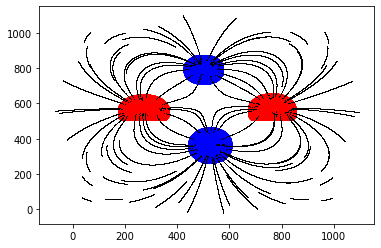

In [29]:
def display_lines_from_img(img,res_x,res_y=None,val_img=None,line_length=1000):
  stationary_charges=extract_charges(img.copy(),val_img)
  line_charges=distribute_line_charges(img.copy(),res_x,res_y)
  lines=np.array(compute_lines(stationary_charges,line_charges,line_length))
  neg,pos=np.split(stationary_charges,2)
  plt.plot(pos[:,0], pos[:,1],"o" ,color=rgb((1.,1.,1.)))
  plt.plot(neg[:,0], neg[:,1],"o" ,color=rgb((2/3,1.,1.)))
  print(lines)
  #lines=lines.flatten()#lines.reshape((int(len(lines.flatten())/3),3))
  for line in lines:
    if len(line)>0:
      nl=[]
      for el in line:
        nl.append([el[0],el[1]])
      nl=np.array(nl)
      print(nl)
      plt.plot(nl[:,0], nl[:,1],",",color="black")  


  plt.show()

display_lines_from_img(testimg,10,line_length=1000)



In [10]:
lines

NameError: ignored